In [5]:
""" This is Phase 1 project Movie Data Exploration File started on 6 May 2023"""
""" FIVE DATASETS: 
1. SQL - MOVIE DATA, im.db
2. CSV - movie grosses, bom.movie_gross.csv
3. TSV - movie info, rt.movie_info.tsv
4. CSV - MOVIE BUDGETS, movie_budgets.csv
5. TSV - reviews, rt.reviews.tsv
6. CSV - movies, movies.csv"""

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import os
import zlib
import zipfile
from zipfile import ZipFile
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path  
import glob
from matplotlib import font_manager


In [883]:
#This is a function to find the number of missing values per column in a dataframe
def missing_values(df_name):
    """This function iterates to find the number of missing values per column"""
    print ("Missing values by Column")
    for col in df_name.columns:
        missing = df_name[col].isna().sum()
        print (str(col) + ": " + str(missing) + " missing values")
    return

In [884]:
# This is a function to create a table of Value Counts for a particular column
def column_value_counts(df_name, col_name):
    list1 = []
    list_dict = {}
    for index, row in df_name.iterrows():
        value = row[col_name]
        if value in list1:
            list_dict[col_name] +=1
            continue
        else:
            list1.append(value)
            list_dict[col_name] = 1

    print("There are " + str(len(list1)) + " unique.")
    return

In [885]:
# 1) SQL - MOVIE DATA  

# Extract SQL db from zip
# ZipFile.extractall(file_path , members=None, pwd=None)Home\MovieData\


#textFile = zipfile.ZipFile("/home/hatenotwelcome/MovieData/im.db.zip", "r")
#textFile.close()

#SQL DB includes 8 tables: principals, known-for, directors, writers, persons, movie_basics, movie_ratings, movie_akas
# principals: *movie_id, 

conn = sqlite3.Connection("/home/bringingthesparkle/FlatIron/Movie_Data/im.db")

q = """
SELECT *
FROM principals
LIMIT 5
;
"""

pd.read_sql(q, conn)

# Connection closed at bottome of file

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [886]:
# 2) MOVIE GROSSES

#This is the CSV containing  movie names and their domestic grosses and foreign grosses
# In this table, title has no missing values, but not sure if all unique, adding an index might be necessary
movie_grosses = pd.read_csv('/home/bringingthesparkle/FlatIron/Movie_Data/bom.movie_gross.csv.gz', sep=',')

print(movie_grosses.dtypes)
print(movie_grosses.tail(5))
print('\n')

missing_values(movie_grosses)


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
                            title      studio  domestic_gross foreign_gross   
3382                    The Quake       Magn.          6200.0           NaN  \
3383  Edward II (2018 re-release)          FM          4800.0           NaN   
3384                     El Pacto        Sony          2500.0           NaN   
3385                     The Swan  Synergetic          2400.0           NaN   
3386            An Actor Prepares       Grav.          1700.0           NaN   

      year  
3382  2018  
3383  2018  
3384  2018  
3385  2018  
3386  2018  


Missing values by Column
title: 0 missing values
studio: 5 missing values
domestic_gross: 28 missing values
foreign_gross: 1350 missing values
year: 0 missing values


In [887]:
# creating new dataframe to represent only those with domestic gross, removing rows without
movie_grosses_domestic = movie_grosses.dropna(subset=['domestic_gross'])
# The initial shape had 3387 rows and 28 less is 3359
print (len(movie_grosses_domestic))
                                        
# then split/apply/combine on studio
studios = []
studios_dict = {}




column_value_counts(movie_grosses_domestic, 'studio')

#for index, row in movie_grosses_domestic.iterrows():
#    studio = row['studio']
#    if studio in studios:
#        studios_dict[studio] +=1
#        continue
#    else:
#        studios.append(studio)
#        studios_dict[studio] = 1

#print("There are " + str(len(studios)) + " unique studios.")
#print (studios)

df = pd.DataFrame(studios_dict.items(), columns=["Studio", "Studio_Count"])
print (df.sort_values(by=['Studio_Count'], ascending = False))



3359
There are 256 unique.
Empty DataFrame
Columns: [Studio, Studio_Count]
Index: []


In [888]:
# replace NaNS with Unknowns
movie_grosses = movie_grosses.replace(np.nan, 'Unknown')

for col in movie_grosses.columns:
    assert movie_grosses[col].isna().sum() == 0

print(movie_grosses.shape)

(3387, 5)


In [889]:
#3) CSV - MOVIE INFO

# This is the CSV with movie information with columns: id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio.
# ID has type int64, all others are mixed type objects and may need cleaning. 
movie_info = pd.read_csv('/home/bringingthesparkle/FlatIron/Movie_Data/rt.movie_info.tsv', sep='\t')
print(movie_info.head(2))

#print(movie_info.dtypes)
#print(movie_info.shape) # Shape is (1560 by 12)

# Assert that 'id' is a unique record and there are no missing values
assert movie_info["id"].isna().sum() == 0

#Using missing values function to count NaNs per column
missing_values(movie_info)


   id                                           synopsis rating   
0   1  This gritty, fast-paced, and innovative police...      R  \
1   3  New York City, not-too-distant-future: Eric Pa...      R   

                                 genre          director   
0  Action and Adventure|Classics|Drama  William Friedkin  \
1    Drama|Science Fiction and Fantasy  David Cronenberg   

                         writer  theater_date      dvd_date currency   
0                Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN  \
1  David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
Missing values by Column
id: 0 missing values
synopsis: 62 missing values
rating: 3 missing values
genre: 8 missing values
director: 199 missing values
writer: 449 missing values
theater_date: 359 missing values
dvd_date: 359 missing values
currency: 1220 mis

In [890]:
train_set = ["The sky is blue.", "My future is as bright as the sun.", "I have international level problems."]
test_set = ["The sun in the sky is bright.", "We can see the shining sun, the bright sun."]
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(train_set) # I like data science and I'd like to really go back to grad school in eng, eng mgmt
print ("Vocabulary:")
print(count_vectorizer.vocabulary_)
Vocab = list(count_vectorizer.vocabulary_)
print(Vocab)

# Vocabulary: {'blue': 0, 'sun': 1, 'bright': 2, 'sky': 3}
freq_term_matrix = count_vectorizer.transform(test_set)
print (freq_term_matrix.todense())

count_array = freq_term_matrix.toarray()
df = pd.DataFrame(data=count_array, columns=Vocab)
print(df)

#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf = TfidfTransformer(norm="l2")
#tfidf.fit(freq_term_matrix)
#print ("IDF:")
#print(tfidf.idf_)


import altair as alt
import numpy as np

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

Vocabulary:
{'the': 12, 'sky': 10, 'is': 6, 'blue': 1, 'my': 8, 'future': 3, 'as': 0, 'bright': 2, 'sun': 11, 'have': 4, 'international': 5, 'level': 7, 'problems': 9}
['the', 'sky', 'is', 'blue', 'my', 'future', 'as', 'bright', 'sun', 'have', 'international', 'level', 'problems']
[[0 0 1 0 0 0 1 0 0 0 1 1 2]
 [0 0 1 0 0 0 0 0 0 0 0 2 2]]
   the  sky  is  blue  my  future  as  bright  sun  have  international   
0    0    0   1     0   0       0   1       0    0     0              1  \
1    0    0   1     0   0       0   0       0    0     0              0   

   level  problems  
0      1         2  
1      2         2  


ModuleNotFoundError: No module named 'altair'

In [ ]:
# Make a heat map of most frequent words.  Might need to

#Creat a mini df (slice)
mini_df = movie_info.iloc[3:5]
print(mini_df)
# Create a 
syns = mini_df['synopsis']
print(type(syns))
#print(syns[0])
success_set = syns
test_set = ['This is a movie about a woman who no one believed and everyone thought this was her job fast innovative complex daring bold adventure']
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(syns) # I like data science and I'd like to really go back to grad school in eng, eng mgmt
print ("Vocabulary:")
print(count_vectorizer.vocabulary_)
Vocab = list(count_vectorizer.vocabulary_)
print(Vocab)

freq_term_matrix = coun_vect.transform(test_set)
print (freq_term_matrix.todense())

count_array = freq_term_matrix.toarray()
df = pd.DataFrame(data=count_array, columns=Vocab)
print(df)

"""
train_set = ["The sky is blue.", "My future is bright.", "I have international level problems."]
test_set = ["The sun in the sky is bright.", "We can see the shining sun, the bright sun."]
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(train_set) # I like data science and I'd like to really go back to grad school in eng, eng mgmt
print ("Vocabulary:")
print(count_vectorizer.vocabulary_)
Vocab = list(count_vectorizer.vocabulary_)
print(Vocab)

# Vocabulary: {'blue': 0, 'sun': 1, 'bright': 2, 'sky': 3}
freq_term_matrix = count_vectorizer.transform(test_set)
print (freq_term_matrix.todense())

count_array = freq_term_matrix.toarray()
df = pd.DataFrame(data=count_array, columns=Vocab)
print(df)"""

#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf = TfidfTransformer(norm="l2")
#tfidf.fit(freq_term_matrix)
#print ("IDF:")
#print(tfidf.idf_)"""

   id                                           synopsis rating   
3   6  Michael Douglas runs afoul of a treacherous su...      R  \
4   7                                            Unknown     NR   

                        genre        director   
3  Drama|Mystery and Suspense  Barry Levinson  \
4               Drama|Romance  Rodney Bennett   

                            writer theater_date      dvd_date currency   
3  Paul Attanasio|Michael Crichton  Dec 9, 1994  Aug 27, 1997  Unknown  \
4                     Giles Cooper      Unknown       Unknown  Unknown   

  box_office      runtime   studio  
3    Unknown  128 minutes  Unknown  
4    Unknown  200 minutes  Unknown  
<class 'pandas.core.series.Series'>
Vocabulary:
{'michael': 27, 'douglas': 15, 'runs': 37, 'afoul': 1, 'of': 32, 'treacherous': 49, 'supervisor': 41, 'in': 21, 'this': 46, 'film': 18, 'version': 51, 'crichton': 11, 'novel': 31, 'plays': 34, 'tom': 48, 'sanders': 38, 'an': 2, 'executive': 16, 'at': 4, 'digicom': 13,

ValueError: Shape of passed values is (1, 1866), indices imply (1, 53)

In [ ]:
# Replacing NaNs and asserting that none remain

movie_info = movie_info.replace(np.nan, 'Unknown')

for col in movie_info.columns:
    assert movie_info[col].isna().sum() == 0

In [ ]:
movie_info["genre"].value_counts().nlargest(10)
# Clearly the genre column contains more than one category 

genre
Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: count, dtype: int64

In [ ]:
# Massage the data 

# Create a list of all genres to query on.
movie_genres = []
movie_genre_dict = {}

for index, row in movie_info.iterrows():
    massage = row['genre']
    data = massage.split("|")
    #print (data)
    for word in data:
        if word in movie_genres:
            movie_genre_dict[word] +=1
        else:
            movie_genres.append(word)
            movie_genre_dict[word] = 1

    

print("There are " + str(len(movie_genres)) + " unique genres.")
print (movie_genres)

df = pd.DataFrame(movie_genre_dict.items(), columns=["Genre", "Genre_Counts"])
print (df.sort_values(by=['Genre_Counts'], ascending = False))


There are 22 unique genres.
['Action and Adventure', 'Classics', 'Drama', 'Science Fiction and Fantasy', 'Musical and Performing Arts', 'Mystery and Suspense', 'Romance', 'Kids and Family', 'Comedy', 'Unknown', 'Documentary', 'Special Interest', 'Art House and International', 'Horror', 'Western', 'Television', 'Sports and Fitness', 'Animation', 'Faith and Spirituality', 'Cult Movies', 'Anime and Manga', 'Gay and Lesbian']
                          Genre  Genre_Counts
2                         Drama           912
8                        Comedy           550
0          Action and Adventure           366
5          Mystery and Suspense           309
12  Art House and International           265
6                       Romance           198
1                      Classics           193
3   Science Fiction and Fantasy           172
13                       Horror           134
7               Kids and Family            99
4   Musical and Performing Arts            98
10                  Do

In [ ]:
# 4) CSV - MOVIE BUDGETS
#This is the file tn.movie_budgets.csv.gz. This is the only file with the budgets and grosses from which you can obtain the ROI.

movie_budgets = pd.read_csv('/home/bringingthesparkle/FlatIron/Movie_Data/tn.movie_budgets.csv.gz', sep=',')
print(movie_budgets.shape)
print(movie_budgets.dtypes)
print(movie_budgets.tail(5))
print('\n')

missing_values(movie_budgets)  #

(5782, 6)
id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object
      id  release_date                          movie production_budget   
5777  78  Dec 31, 2018                         Red 11            $7,000  \
5778  79   Apr 2, 1999                      Following            $6,000   
5779  80  Jul 13, 2005  Return to the Land of Wonders            $5,000   
5780  81  Sep 29, 2015           A Plague So Pleasant            $1,400   
5781  82   Aug 5, 2005              My Date With Drew            $1,100   

     domestic_gross worldwide_gross  
5777             $0              $0  
5778        $48,482        $240,495  
5779         $1,338          $1,338  
5780             $0              $0  
5781       $181,041        $181,041  


Missing values by Column
id: 0 missing values
release_date: 0 missing values
movie: 0 missing values
production_budget: 0 missi

In [ ]:
# String cleaning to turn budget and gross figures into numeric values, and compute the ROI.
movie_budgets["production_budget"] = movie_budgets["production_budget"].str.replace("$","").str.replace(",","")
movie_budgets["production_budget"] = pd.to_numeric(movie_budgets["production_budget"])
movie_budgets["domestic_gross"] = movie_budgets["domestic_gross"].str.replace("$","").str.replace(",","")
movie_budgets["domestic_gross"] = pd.to_numeric(movie_budgets["domestic_gross"])
movie_budgets["worldwide_gross"] = movie_budgets["worldwide_gross"].str.replace("$","").str.replace(",","")
movie_budgets["worldwide_gross"] = pd.to_numeric(movie_budgets["worldwide_gross"])
movie_budgets["ROI"] = ((movie_budgets["domestic_gross"] + movie_budgets["worldwide_gross"]) - movie_budgets["production_budget"])
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [ ]:
#Now that ROI has been calculated, can sort by ROI
movie_budgets.sort_values('ROI', ascending = False, inplace=True)
print(movie_budgets.head(2))


   id  release_date                                 movie  production_budget   
0   1  Dec 18, 2009                                Avatar          425000000  \
5   6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens          306000000   

   domestic_gross  worldwide_gross         ROI  
0       760507625       2776345279  3111852904  
5       936662225       2053311220  2683973445  


In [ ]:
# Calculate percentiles
data = np.array(movie_budgets['ROI'])
print(len(data))
q75, q25 = np.percentile(data, [75 ,25])
iqr = q75 - q25
print (q75)
print(q25)
top_25_pct = movie_budgets[movie_budgets['ROI']> q75]
print(type(top_25_pct))
bottom_25_pct = movie_budgets[movie_budgets['ROI']< q25 ]
#iqr_range = movie_budgets.loc[[movie_budgets['ROI']> q25] & [movie_budgets['ROI']<q75]]
print(len(top_25_pct))
print(len(bottom_25_pct))
#above_35 = titanic[titanic["Age"] > 35]

5782
111164787.5
-309822.25
<class 'pandas.core.frame.DataFrame'>
1446
1446


In [ ]:
top_25_pct.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2667572339
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2426949682
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2086125489


Text(0, 0.5, 'ROI in Billions of $')

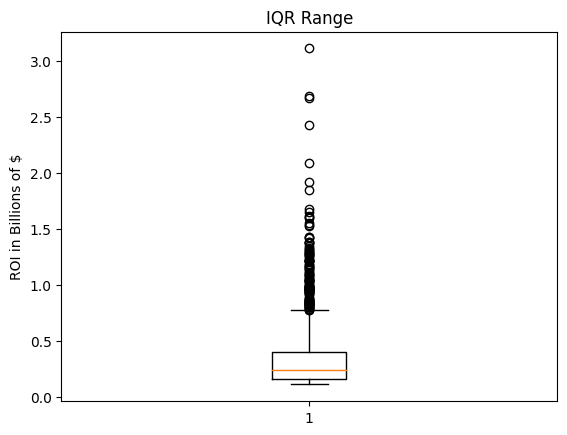

In [ ]:
#boxplot of ROI (later to be updated with the by genre specs)
#matplotlib.pyplot.boxplot(movie_budgets['ROI']) 
matplotlib.pyplot.boxplot((top_25_pct['ROI'])/1000000000) # This isn't right
matplotlib.pyplot.title('IQR Range')
matplotlib.pyplot.ylabel('ROI in Billions of $')
#matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)
#matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)

In [ ]:
# Exploration of Titles

from sklearn.feature_extraction.text import CountVectorizer

vocab_list = top_25_pct['movie']
print(type(vocab_list.to_list()))
coun_vect = CountVectorizer()
coun_vect.fit_transform(vocab_list.to_list())
print ("Vocabulary:")
print((coun_vect.vocabulary_))

"""

text = ["John is a good boy. John watches basketball"]

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

"""

#freq_term_matrix = coun_vect.transform(vocab_list)
#print (freq_term_matrix.todense())

#"""train_set = ["The sky is blue.", "My future is bright.", "I have international level problems."]
#test_set = ["The sun in the sky is bright.", "We can see the shining sun, the bright sun."]
#count_vectorizer = CountVectorizer()
#count_vectorizer.fit_transform(train_set) # I like data science and I'd like to really go back to grad school in eng, eng mgmt
#print ("Vocabulary:")
#print(count_vectorizer.vocabulary_)
#Vocab = list(count_vectorizer.vocabulary_)
#print(Vocab)

# Vocabulary: {'blue': 0, 'sun': 1, 'bright': 2, 'sky': 3}
#freq_term_matrix = count_vectorizer.transform(test_set)
#print (freq_term_matrix.todense())

#count_array = freq_term_matrix.toarray()
#df = pd.DataFrame(data=count_array, columns=Vocab)
#print(df)

#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf = TfidfTransformer(norm="l2")
#tfidf.fit(freq_term_matrix)
#print ("IDF:")
#print(tfidf.idf_)"""



<class 'list'>
Vocabulary:
{'avatar': 122, 'star': 1545, 'wars': 1781, 'ep': 535, 'vii': 1753, 'the': 1622, 'force': 619, 'awakens': 128, 'titanic': 1649, 'avengers': 124, 'infinity': 839, 'war': 1776, 'jurassic': 904, 'world': 1829, 'black': 190, 'panther': 1203, 'furious': 646, 'incredibles': 835, 'viii': 1754, 'last': 948, 'jedi': 875, 'beauty': 159, 'and': 75, 'beast': 156, 'harry': 747, 'potter': 1279, 'deathly': 430, 'hallows': 734, 'part': 1210, 'ii': 823, 'fallen': 571, 'kingdom': 922, 'age': 45, 'of': 1165, 'ultron': 1707, 'frozen': 639, 'lord': 995, 'rings': 1369, 'return': 1353, 'king': 921, 'iron': 857, 'man': 1020, 'minions': 1069, 'phantom': 1239, 'menace': 1053, 'rogue': 1385, 'one': 1173, 'story': 1566, 'captain': 268, 'marvel': 1033, 'park': 1209, 'dark': 413, 'knight': 928, 'lion': 981, 'aquaman': 96, 'shrek': 1471, 'finding': 600, 'dory': 477, 'america': 65, 'civil': 320, 'toy': 1669, 'transformers': 1676, 'moon': 1095, 'jumanji': 899, 'welcome': 1796, 'to': 1652, 'j

In [ ]:
#5) TSV - reviews, rt.reviews.tsv
# ratings is in multiple different forms and would need manipulation

movie_info = pd.read_csv('/home/bringingthesparkle/FlatIron/Movie_Data/rt.reviews.tsv', sep='\t', encoding='latin1')
print(movie_info.head(5))

print(movie_info.dtypes)
print(movie_info.shape) # Shape is (1560 by 12)

# Assert that 'id' is a unique record and there are no missing values
assert movie_info["id"].isna().sum() == 0

#Using missing values function to count NaNs per column
missing_values(movie_info)

   id                                             review rating   fresh   
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh  \
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  
id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher

In [ ]:
#6) CSV - movies, tmdb_movies.csv
import pandas as pd

movie_tmdb = pd.read_csv('/home/bringingthesparkle/FlatIron/Movie_Data/tmdb.movies.csv', sep=',')

#print(movie_tmdb.dtypes)
print(movie_tmdb.head(2))
print('\n')

# Assert that 'id' is a unique record and there are no missing values
assert movie_tmdb["id"].isna().sum() == 0
 # Drop Unnamed column which is just another index, as it seems to cause issues later with the merge, creating duplicate entries and we already have an index and unique id
movie_tmdb.drop('Unnamed: 0', axis=1, inplace=True)


   Unnamed: 0            genre_ids     id original_language   
0           0      [12, 14, 10751]  12444                en  \
1           1  [14, 12, 16, 10751]  10191                en   

                                 original_title  popularity release_date   
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19  \
1                      How to Train Your Dragon      28.734   2010-03-26   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  




In [ ]:
print(movie_tmdb.head(2))

             genre_ids     id original_language   
0      [12, 14, 10751]  12444                en  \
1  [14, 12, 16, 10751]  10191                en   

                                 original_title  popularity release_date   
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19  \
1                      How to Train Your Dragon      28.734   2010-03-26   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  


In [1035]:
missing_values(movie_tmdb)

Missing values by Column
Unnamed: 0: 0 missing values
genre_ids: 0 missing values
id: 0 missing values
original_language: 0 missing values
original_title: 0 missing values
popularity: 0 missing values
release_date: 0 missing values
title: 0 missing values
vote_average: 0 missing values
vote_count: 0 missing values


In [2]:
# Can get genre ids from API call to tmdb
#https://www.themoviedb.org/settings/api
# see https://www.sololearn.com/compiler-playground/WgZHrhC3dhbh/?ref=app

import json
import requests

term = 'genres'

def get_keys(path):
    with open(path) as f:
        return json.load(f)

keys = get_keys("/home/bringingthesparkle/.secret/tmdb_api.json")

api_key = keys['api_key']

#the api url that contains the dictionary of genre types.
url = "https://api.themoviedb.org/3//genre/movie/list"

headers = {
    "accept": "application/json",
    "Authorization": 'Bearer {}'.format(api_key),
}

url_params = {
                'term': term.replace(" ", "+")
}

response = requests.get(url, headers=headers, params = url_params)

print(response.text)

text_file = open("/home/bringingthesparkle/FlatIron/genre_ids.txt", "w")
n = text_file.write('response.text')
text_file.close()

# using json.loads() method
result = json.loads(response.text)


  


{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


In [9]:
#continuing without making another API call
#print(result)
genre_list = result['genres']
#print(len(genre_list))
#print(genre_list)
# Use API generated list to create mapping to turn values into genre names
# this is what mapping looks like s.map({'cat': 'kitten', 'dog': 'puppy'})
map_dict = {}

for item in result['genres']:
    it = iter(item.values())
    first, second = next(it), next(it)
    map_dict[first] = second

print (map_dict)

#lets try the mapping out
s = pd.Series([28, 80, 17])
s.map(map_dict)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


0    Action
1     Crime
2       NaN
dtype: object

In [1036]:
#movie_tmdb and genre_ids
movie_genre_ids = []
genre_id_dict = {}

for index, row in movie_tmdb.iterrows():
    massage = row['genre_ids']
    massage = massage.replace("[", "")
    massage = massage.replace("]", "")
    massage = massage.replace(" ", "")
    data = massage.split(",")
    for id in data:
        if id in movie_genre_ids:
            genre_id_dict[id] +=1
        else:
            movie_genre_ids.append(id)
            genre_id_dict[id] = 1

    

print("There are " + str(len(set(movie_genre_ids))) + " unique genre ids.")
print (movie_genre_ids)

df_id = pd.DataFrame(genre_id_dict.items(), columns=["Genre_id", "Genre_Counts"])
print (df_id.sort_values(by=['Genre_Counts'], ascending = False))

There are 20 unique genre ids.
['12', '14', '10751', '16', '28', '878', '35', '53', '27', '80', '18', '10749', '10402', '9648', '36', '37', '10770', '10752', '99', '']
   Genre_id  Genre_Counts
10       18          8303
6        35          5652
18       99          4965
7        53          4207
8        27          3683
4        28          2612
19                   2479
11    10749          2321
5       878          1762
2     10751          1565
9        80          1515
3        16          1486
0        12          1400
12    10402          1267
13     9648          1237
1        14          1139
16    10770          1084
14       36           622
17    10752           330
15       37           205


In [ ]:
# check for missing values
missing_values(movie_tmdb) 

Missing values by Column
genre_ids: 0 missing values
id: 0 missing values
original_language: 0 missing values
original_title: 0 missing values
popularity: 0 missing values
release_date: 0 missing values
title: 0 missing values
vote_average: 0 missing values
vote_count: 0 missing values


In [902]:
# Attempting to inner join movie_budgets df & movie_tmbd and on movie title. 
# I know that I will have to update one of the field before the merge to get accurate result, but then I'll have to do this anyway, so... doing this part first.

title_merge_df = pd.merge(top_25_pct, movie_tmdb, left_on='movie', right_on='original_title', how='left')
print((title_merge_df.shape)) # Without cleaning the titles up, we get an inner join that yields 2316 records 
# movie_budgets original length is 5782 records, top_25_percent is 
title_merge_df.head(10)

(1549, 17)


,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,ROI,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0
1,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2667572339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2426949682,23811.0,"[12, 28, 14]",299536.0,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948.0
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2086125489,14193.0,"[28, 12, 878, 53]",135397.0,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056.0
5,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1916215444,5179.0,"[878, 28, 12]",24428.0,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673.0
6,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1848317790,3444.0,"[28, 16]",86841.0,en,Black Panther,2.058,2011-01-18,Black Panther,5.1,11.0
7,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1848317790,23817.0,"[28, 12, 14, 878]",284054.0,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365.0
8,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1681729814,14196.0,"[28, 80, 53]",168259.0,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538.0
9,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1651102455,23826.0,"[28, 12, 16, 10751]",260513.0,en,Incredibles 2,36.286,2018-06-15,Incredibles 2,7.6,6354.0


In [903]:
missing_values(title_merge_df)
#print(title_merge_df.columns)
# Because this is an outer join, there is no field that is a unique identifier, adding a new index-column, and dropping id_x and id_y
title_merge_df.drop('id_x', axis=1, inplace=True)
title_merge_df.drop('id_y', axis=1, inplace=True)
title_merge_df = title_merge_df.reset_index()
print(title_merge_df.head())


Missing values by Column
id_x: 0 missing values
release_date_x: 0 missing values
movie: 0 missing values
production_budget: 0 missing values
domestic_gross: 0 missing values
worldwide_gross: 0 missing values
ROI: 0 missing values
Unnamed: 0: 880 missing values
genre_ids: 880 missing values
id_y: 880 missing values
original_language: 880 missing values
original_title: 880 missing values
popularity: 880 missing values
release_date_y: 880 missing values
title: 880 missing values
vote_average: 880 missing values
vote_count: 880 missing values
   index release_date_x                                 movie   
0      0   Dec 18, 2009                                Avatar  \
1      1   Dec 18, 2015  Star Wars Ep. VII: The Force Awakens   
2      2   Dec 19, 1997                               Titanic   
3      3   Apr 27, 2018                Avengers: Infinity War   
4      4   Jun 12, 2015                        Jurassic World   

   production_budget  domestic_gross  worldwide_gross         RO

In [904]:
title_merge_df['Year'] = title_merge_df['release_date_x'].str.strip().str[-4:]
title_merge_df.sort_values('ROI', ascending = False, inplace=True)
print(title_merge_df.head(3))

   index release_date_x                                 movie   
0      0   Dec 18, 2009                                Avatar  \
1      1   Dec 18, 2015  Star Wars Ep. VII: The Force Awakens   
2      2   Dec 19, 1997                               Titanic   

   production_budget  domestic_gross  worldwide_gross         ROI  Unnamed: 0   
0          425000000       760507625       2776345279  3111852904         6.0  \
1          306000000       936662225       2053311220  2683973445         NaN   
2          200000000       659363944       2208208395  2667572339         NaN   

           genre_ids original_language original_title  popularity   
0  [28, 12, 14, 878]                en         Avatar      26.526  \
1                NaN               NaN            NaN         NaN   
2                NaN               NaN            NaN         NaN   

  release_date_y   title  vote_average  vote_count  Year  
0     2009-12-18  Avatar           7.4     18676.0  2009  
1            NaN   

In [905]:
title_merge_df.sort_values(('Year'), ascending = True, inplace=True)
print(title_merge_df.head(2))

     index release_date_x                            movie  production_budget   
466    466   Dec 21, 1937  Snow White and the Seven Dwarfs            1488000  \
224    224   Dec 15, 1939               Gone with the Wind            3900000   

     domestic_gross  worldwide_gross        ROI  Unnamed: 0 genre_ids   
466       184925486        184925486  368362972         NaN       NaN  \
224       198680470        390525192  585305662         NaN       NaN   

    original_language original_title  popularity release_date_y title   
466               NaN            NaN         NaN            NaN   NaN  \
224               NaN            NaN         NaN            NaN   NaN   

     vote_average  vote_count  Year  
466           NaN         NaN  1937  
224           NaN         NaN  1939  


In [911]:
#Replace nans in "original_language" with "unk" 
title_merge_df['original_language'].fillna('unk', inplace=True)
print(set(title_merge_df['original_language']))

{'es', 'unk', 'en', 'te', 'ja'}


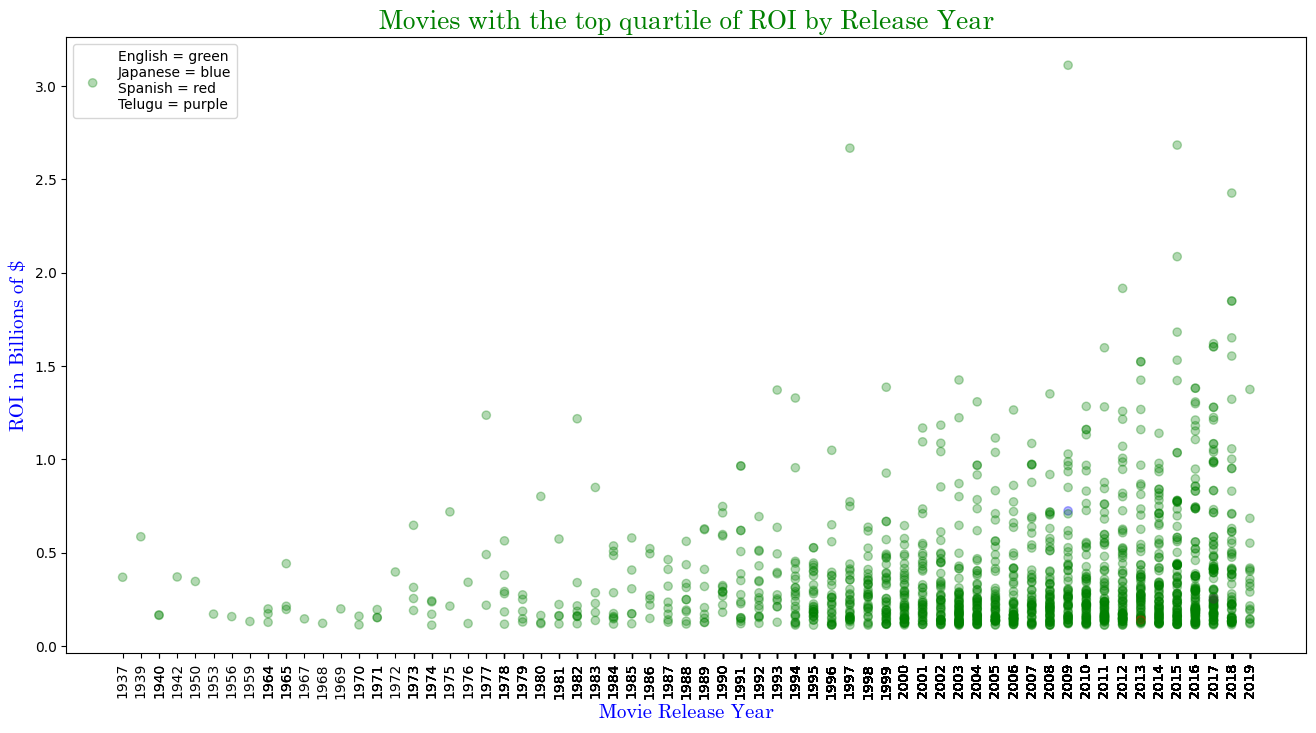

In [936]:
# Create a scatter-plot
fig, ax = plt.subplots(figsize=(16, 8))

# Instead of foreign languages, once I have mapped directors, I can use the same color schema for top directors, or studios, or whatever
colors = title_merge_df.original_language.map({'en': 'green', 'ja': 'blue', 'te': 'purple', 'es': 'red', 'unk': 'green'})
legend_text =  'English = green\nJapanese = blue\nSpanish = red\nTelugu = purple' # who knew that Telgug

font1 = {'family':'suranna','color':'blue','size':20}
font2 = {'family':'suranna','color':'blue','size':15}
font3 = {'family':'suranna','color':'green','size':20}

ax.scatter(
    x=title_merge_df["Year"], y=((title_merge_df["ROI"])/1000000000), alpha=0.3, c=colors, label = legend_text
)

ax.set_xticks((title_merge_df['Year']))
ax.set_xticklabels(title_merge_df['Year'], rotation = 90)
ax.set_xlabel("Movie Release Year", fontdict = font2)
ax.set_ylabel("ROI in Billions of $", fontdict = font2)
ax.set_title("Movies with the top quartile of ROI by Release Year", fontdict=font3)
ax.legend(loc="upper left");

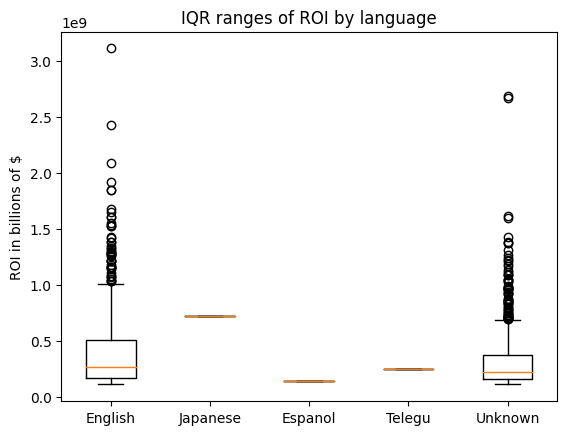

In [945]:
# Creating multiple boxplots, can change to other for

en = title_merge_df.loc[title_merge_df['original_language'] == 'en', 'ROI'].values
ja = title_merge_df.loc[title_merge_df['original_language'] == 'ja', 'ROI'].values
es =title_merge_df.loc[title_merge_df['original_language'] == 'es', 'ROI'].values
te = title_merge_df.loc[title_merge_df['original_language'] == 'te', 'ROI'].values
unk = title_merge_df.loc[title_merge_df['original_language'] == 'unk', 'ROI'].values

plt.title('IQR ranges of ROI by language')
plt.ylabel('ROI in billions of $')
plt.boxplot([en, ja, es, te, unk], labels = ['English','Japanese','Espanol','Telegu', 'Unknown' ]);



<bound method _AxesBase.get_xticklabels of <Axes: title={'center': 'Movies with the top quartile of ROI by Release Year'}, xlabel='original_language', ylabel='ROI'>>


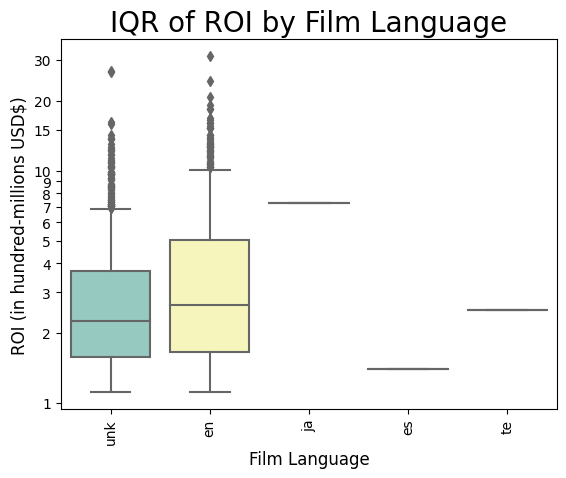

In [1031]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter


sns.boxplot(x = 'original_language', y='ROI', data = title_merge_df, palette="Set3")
#print(ax.get_xticklabels)
plt.yscale('log')
plt.title('IQR of ROI by Film Language', fontsize=20)
plt.xlabel('Film Language', fontsize=12)
plt.ylabel('ROI (in hundred-millions USD$)', fontsize=12)
ytick_values = [1e8, 2e8, 3e8, 4e8, 5e8, 6e8, 7e8, 8e8, 9e8, 1e9, 1.5e9, 2e9, 3e9]
ytick_labels = []
for value in ytick_values:
    label = (str(int(value/100000000)))
    ytick_labels.append(label)
plt.yticks(ticks=ytick_values, labels=ytick_labels)
#axis.set(xticks =['en', 'ja', 'unk', 'es', 'te'], xticklabel=['E', 'J', "U", 'S', 'T'])

plt.xticks(rotation=90);


In [ ]:
# prep to plot boxplots by year
title_merge_df.groupby(by='Year', dropna=True)

# Set the figure size
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box1": title_merge_df.groupby(by='Year', dropna=True)}) #, "Box2": 1})

# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()



ValueError: If using all scalar values, you must pass an index

In [ ]:
#Write a function that finds duplicate titles, and allows the user (me) to analyze them and drop the selected record or None
def duplicate_check(df, col1, index_col):
    names = []
    names_dict = {}
    for index, row in df.iterrows():
        name = row['movie']
        if name in names:
            names_dict[name] +=1
            #names_dict['index'].append(index)
        else:
            names.append(name)
            names_dict[name] = 1
            names_dict['index'] = df[index_col]
    print(len(names))
    for name in names:
        if names_dict[name] > 2:
            
    print(name, names_dict['index'])
    return

duplicate_check(title_merge_df, 'movies', 'index')

5699
Beauty and the Beast 0            0
1            1
2            2
3            3
4            4
         ...  
30415    30415
30416    30416
30417    30417
30418    30418
30419    30419
Name: index, Length: 30420, dtype: int64
Alice in Wonderland 0            0
1            1
2            2
3            3
4            4
         ...  
30415    30415
30416    30416
30417    30417
30418    30418
30419    30419
Name: index, Length: 30420, dtype: int64
Venom 0            0
1            1
2            2
3            3
4            4
         ...  
30415    30415
30416    30416
30417    30417
30418    30418
30419    30419
Name: index, Length: 30420, dtype: int64
Moana 0            0
1            1
2            2
3            3
4            4
         ...  
30415    30415
30416    30416
30417    30417
30418    30418
30419    30419
Name: index, Length: 30420, dtype: int64
King Kong 0            0
1            1
2            2
3            3
4            4
         ...  
30415    30415
304

In [1]:
# Group by Year and do a boxplot of years



#matplotlib.pyplot.boxplot((top_25_pct['ROI'])/1000000000)
title_merge_df[title_merge_df.Year == 2018].pyplot.scatter('Year', 'ROI')
matplotlib.pyplot.title('IQR Range', fontdict=font2)
matplotlib.pyplot.ylabel('ROI in Billions of $', fontdict = font2);



NameError: name 'title_merge_df' is not defined

In [ ]:

# Gotta close that SQL file connection from earlier
conn.close()